In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [17]:
df = pd.read_csv('lending_club_loan.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             50000 non-null  int64  
 1   term                  50000 non-null  object 
 2   int_rate              50000 non-null  float64
 3   installment           50000 non-null  float64
 4   grade                 50000 non-null  object 
 5   sub_grade             50000 non-null  object 
 6   emp_title             47144 non-null  object 
 7   emp_length            47708 non-null  object 
 8   home_ownership        50000 non-null  object 
 9   annual_inc            50000 non-null  float64
 10  verification_status   50000 non-null  object 
 11  issue_d               50000 non-null  object 
 12  loan_status           50000 non-null  object 
 13  purpose               50000 non-null  object 
 14  title                 49806 non-null  object 
 15  dti                

In [4]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,49971.000000,50000.000000,45309.000000,49937.000000
mean,14105.965000,13.657471,431.434680,7.417736e+04,17.371610,11.319840,0.180100,15822.882940,53.803487,25.456140,1.809618,0.122995
std,8361.115955,4.461604,250.253421,5.767275e+04,8.195693,5.113827,0.511067,19637.023286,24.385062,11.862498,2.139676,0.358519
min,500.000000,5.320000,16.310000,2.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.367500,4.500000e+04,11.280000,8.000000,0.000000,6048.000000,35.900000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.490000,6.350000e+04,16.870000,10.000000,0.000000,11149.000000,54.900000,24.000000,1.000000,0.000000
75%,20000.000000,16.550000,566.225000,9.000000e+04,23.000000,14.000000,0.000000,19544.250000,72.800000,32.000000,3.000000,0.000000
max,40000.000000,30.740000,1533.810000,6.100000e+06,189.900000,51.000000,11.000000,617838.000000,129.400000,111.000000,34.000000,6.000000


In [5]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2856
emp_length              2292
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                    194
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                29
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                4691
pub_rec_bankruptcies      63
address                    0
dtype: int64

In [6]:
# list of attributes that are numerical

df.select_dtypes(['int64', 'float64']).columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [7]:
# list of attributes that are not numerical

df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

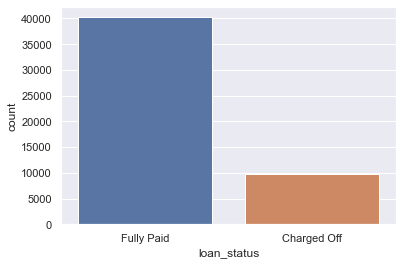

In [8]:
# countplot of loan status

sns.countplot(x='loan_status',data=df)  

(0.0, 45000.0)

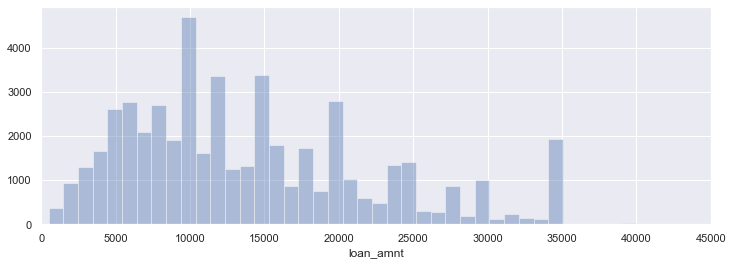

In [10]:
 # creating a histogram of loan amounts

plt.figure(figsize=(12,4)) 
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0, 45000)

(12.0, 0.0)

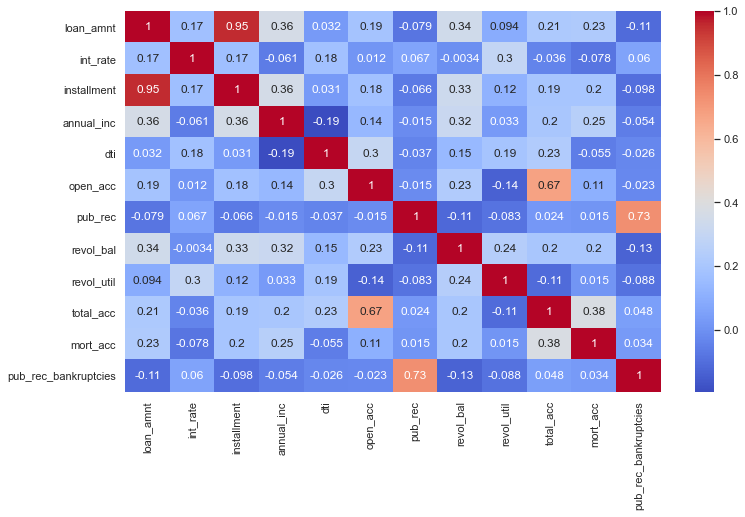

In [11]:
 # creating a corelation map

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.ylim(12, 0)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,9758.0,15117.103915,8530.458013,1000.0,8450.0,14000.0,20000.0,40000.0
Fully Paid,40242.0,13860.781025,8301.108469,500.0,7500.0,12000.0,19200.0,40000.0


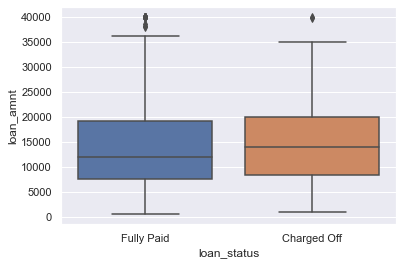

In [12]:
# boxplot showing the relationship between the loan_status and the Loan Amount.

sns.boxplot(x='loan_status',y='loan_amnt',data=df)
df.groupby('loan_status')['loan_amnt'].describe()

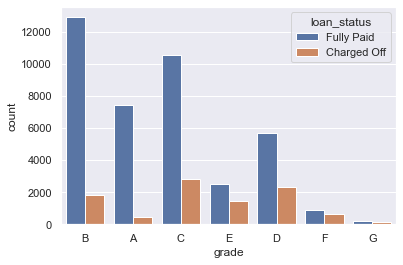

In [13]:
# countplot of loanstatus  for different grades

sns.countplot(x='grade',data=df,hue='loan_status')

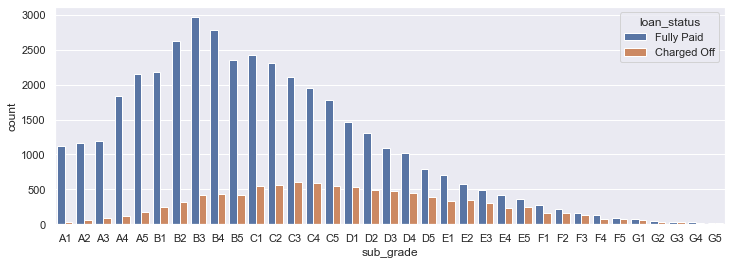

In [14]:
# countplot of loanstatus  for different sub_grades

plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].astype(str).unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order, hue='loan_status')

In [15]:
# Number of unique job titles

df['emp_title'].nunique()

28999

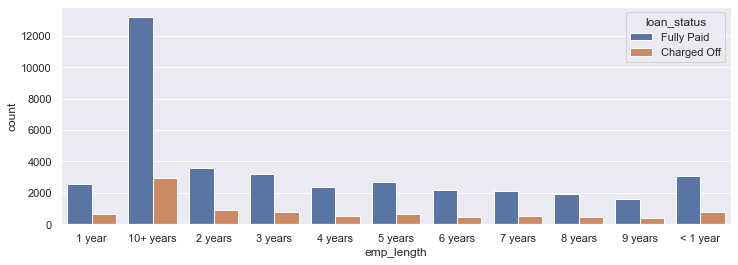

In [16]:
# plotting loan status vs employment length

emp_length_order = sorted(df['emp_length'].dropna().unique())
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')